In [62]:
# import packages
from fractions import Fraction
import matplotlib.pyplot as plt
import networkx as nx
from networkx.utils import graphs_equal
import numpy as np
import math
import cvxpy as cvx
import math
import random
import itertools
# from collections import deque

Number of unique graphs:  5
Number of graphs:  6


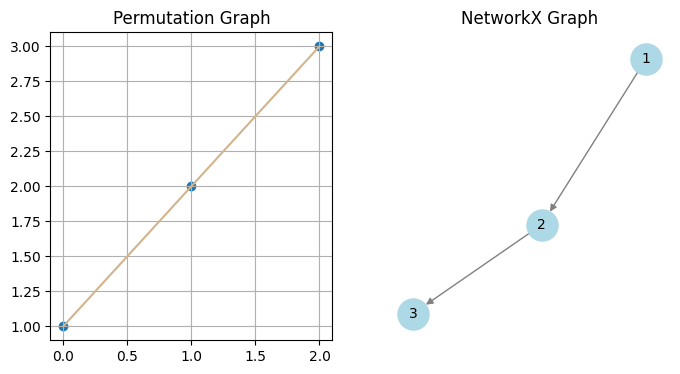

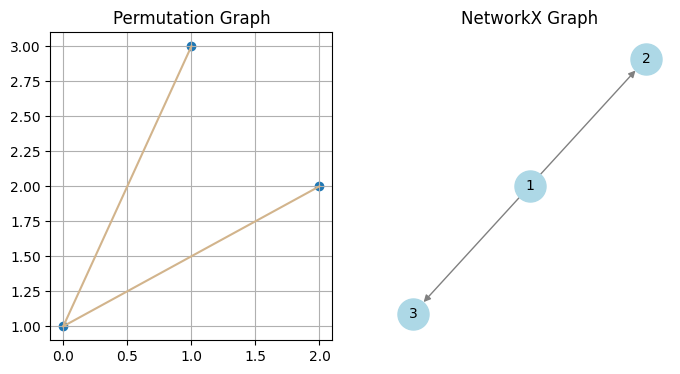

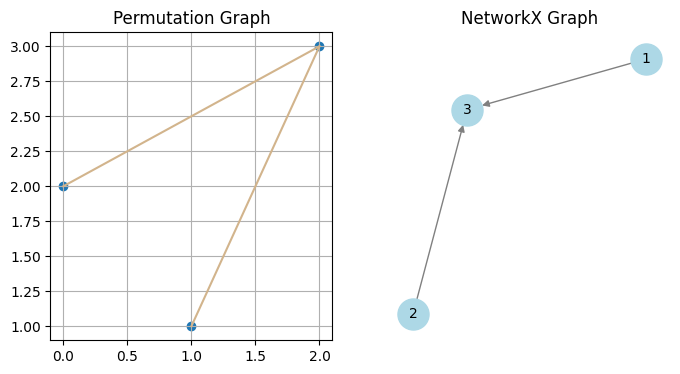

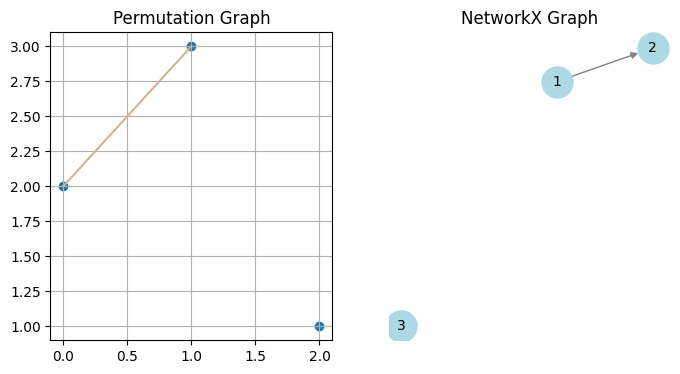

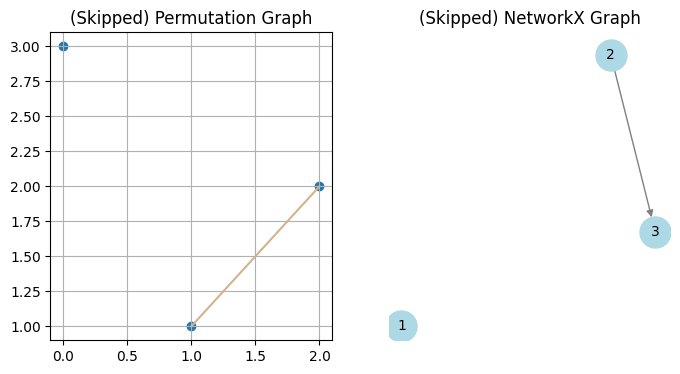

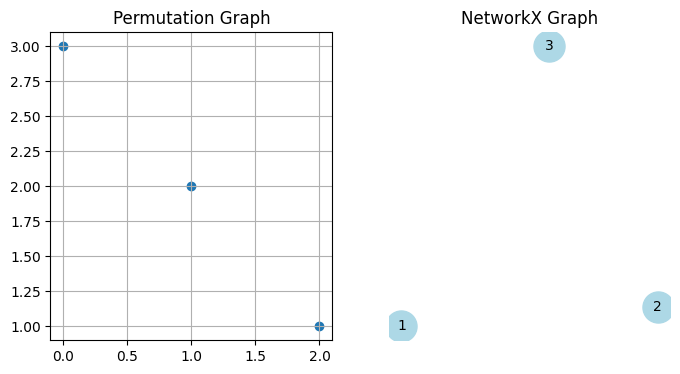

In [76]:
def all_connections(s):
    connections = []
    for i in range(len(s)):
        for j in range(i, len(s)):
            # using the above rule
            if ((j - i) * (s[j] - s[i])) > 0:
                connections.append((i, j))
    # gets rid of duplicates
    connections = list(set(connections))

    valid_connections = set()

    for connection in connections:
        if not in_box(connection, s):
            valid_connections.add((connection[0] + 1, connection[1] + 1))

    # adding auxilary source and sinka
    s = s.copy()
    s.insert(0, 0)
    s.append(len(s))

    connections = []
    for i in range(len(s)):
        for j in range(i, len(s)):
            # using the above rule
            if ((j - i) * (s[j] - s[i])) > 0:
                connections.append((i, j))
    # gets rid of duplicates
    connections = list(set(connections))

    # plt.figure(figsize=(6, 6))
    # plt.scatter(range(0, len(s)), s)

    valid_miss_connections = set()

    for connection in connections:
        if not in_box(connection, s):
            valid_miss_connections.add((connection[0] + 1, connection[1] + 1))
            # x1, x2 = connection[0], connection[1]
            # plt.plot([x1, x2], [s[x1], s[x2]], color='tan')

    # plt.xticks(range(0, len(s) + 1))
    # plt.yticks(range(0, len(s) + 1))
    # plt.grid(True)

    connections = sorted(list(valid_connections))
    miss_connections = sorted(list(valid_miss_connections))

    return connections, miss_connections


def in_box(t, s):
    i, j = t[0], t[1]
    if any(s[x] < s[j] and s[x] > s[i] for x in range(i + 1, j)):
        return True
    return False

def MISS_from_connections(c, s_len):
    g = nx.DiGraph()
    g.add_edges_from(c)
    
    m = np.empty((0, s_len))
        
    sink_nodes = [node for node, out_degree in g.out_degree() if out_degree == 0]
    source_nodes = [node for node, in_degree in g.in_degree() if in_degree == 0]
    for (source, sink) in [(source, sink) for sink in sink_nodes for source in source_nodes]:
        for path in nx.all_simple_paths(g, source=source, target=sink):
            row = np.zeros(s_len)
            for i in path:
                # shifting since auxiliary source and sink should not be in usage matrix
                if i != 1 and i != s_len+2:
                    row[i - 2] = 1
            m = np.concatenate((m, [row]), axis=0)

    return m

def display_graph(pi, connections, g, skipped=False):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    # Scatter plot with connections
    ax1.scatter(range(0, len(pi)), pi)
    for connection in connections:
        connection = (connection[0] - 1, connection[1] - 1)
        if not in_box(connection, pi):
            x1, x2 = connection[0], connection[1]
            ax1.plot([x1, x2], [pi[x1], pi[x2]], color='tan')
    ax1.grid(True)
    ax1.set_title('Permutation Graph') if not skipped else ax1.set_title('(Skipped) Permutation Graph')

    # NetworkX graph

    pos = nx.spring_layout(g)
    nx.draw(g, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10, ax=ax2)

    ax2.set_title('NetworkX Graph') if not skipped else ax2.set_title('(Skipped) NetworkX Graph')

def is_isomorphic_to_any(g, graphs):
    for graph in graphs:
        # if graphs_equal(g, graph):
        if nx.is_isomorphic(g, graph):
            return True
    return False

# pi = [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]
# pi = [2, 4, 9, 3, 5, 7, 6, 8, 1]
# pi = [2, 1, 4, 5, 3]

unique_graphs = []
graphs = []

for pi in itertools.permutations([i for i in range(1, 4)]):
    pi = list(pi)

    # print("pi: ", pi)

    connections, miss_connections = all_connections(pi)

    # print("usage matrix using networkx method:")
    # n = MISS_from_connections(miss_connections, len(pi))
    # print(n)

    # display_graph(pi, connections, miss_connections)

    g = nx.DiGraph()
    g.add_edges_from(miss_connections)
    g = nx.relabel_nodes(g, {i: i-1 for i in range(1, len(pi) + 3)})
    g.remove_node(0)
    g.remove_node(len(pi) + 1)

    graphs.append(g)

    if not is_isomorphic_to_any(g, unique_graphs):
        unique_graphs.append(g)
        display_graph(pi, connections, g)
    else:
        display_graph(pi, connections, g, True)

print("Number of unique graphs: ", len(unique_graphs))
print("Number of graphs: ", len(graphs))